In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import ticker

/var/folders/rd/001y7gzj60q74tv8n4b4pjlr0000gn/T/ipykernel_1248/1367878994.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
date = pd.read_csv("BTC_v4.csv", sep = ";")

date = date.sort_values(by=['Date'])
date['Date'] = pd.to_datetime(date["Date"]).dt.date

date = date.loc[pd.to_datetime(date['Date']) > '2015-01-01']

print(date)

            Date         Price        Volume    Market_cap  No_adresses
3269  2015-01-02    314.446000  3.885591e+07  4.301448e+09       184462
3268  2015-01-03    286.572000  1.187789e+08  3.921358e+09       216194
3267  2015-01-04    260.936000  2.055001e+08  3.571640e+09       209509
3266  2015-01-05    273.220000  1.550381e+08  3.740880e+09       208147
3265  2015-01-06    285.373800  9.700290e+07  3.908408e+09       181346
...          ...           ...           ...           ...          ...
4     2024-01-04  44229.781865  1.404458e+10  8.643705e+11       905275
3     2024-01-05  44162.479144  1.523431e+10  8.630552e+11       772203
2     2024-01-06  43994.009813  5.950649e+09  8.597628e+11       712789
1     2024-01-07  43922.609244  7.287310e+09  8.583675e+11       612667
0     2024-01-08  46932.477244  2.078956e+10  9.171885e+11       662165

[3270 rows x 5 columns]


/var/folders/rd/001y7gzj60q74tv8n4b4pjlr0000gn/T/ipykernel_1248/1287278716.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date['Date'] = pd.to_datetime(date["Date"]).dt.date


In [4]:
date.dtypes

Date            object
Price          float64
Volume         float64
Market_cap     float64
No_adresses      int64
dtype: object

In [5]:
#date['No_adresses'] = date['No_adresses'].astype(float) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


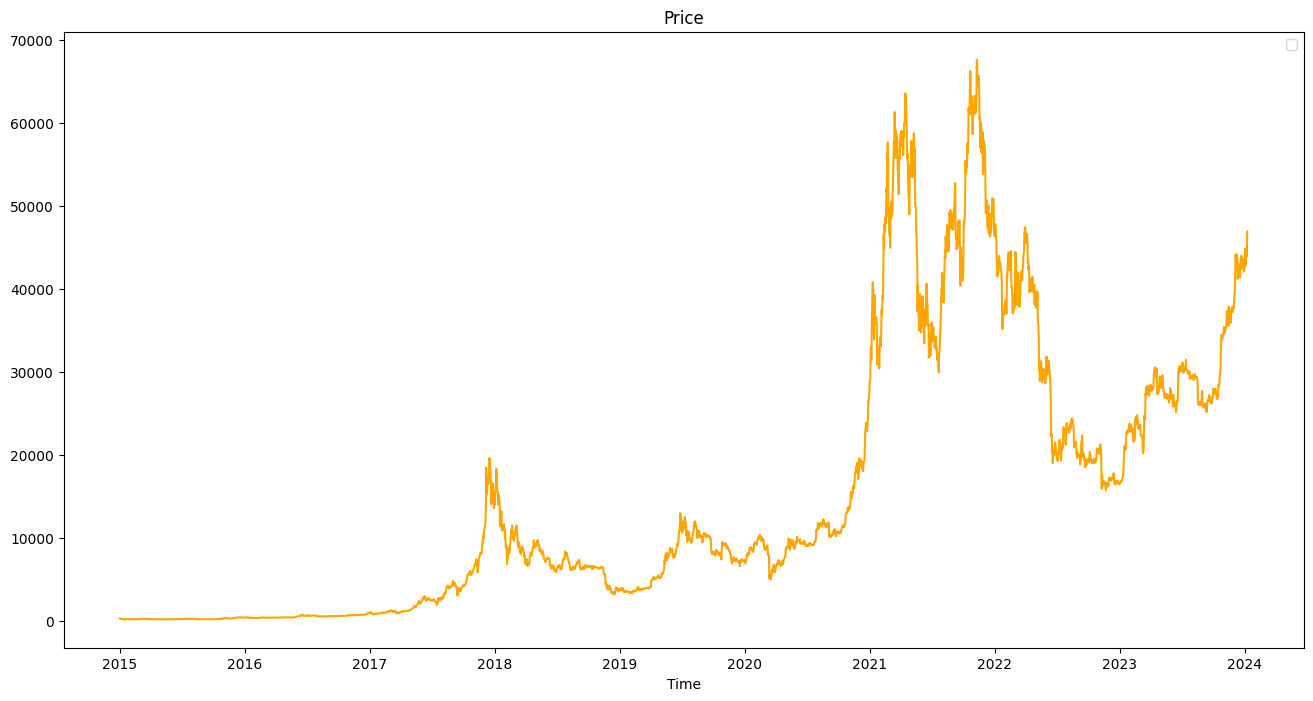

In [6]:
plt.figure(figsize=(16, 8)) 
  
plt.plot(date['Date'], date['Price'], color='orange') 
#date['No_adresses'].plot(label='No_adresses') 


plt.title('Price') 
  
plt.xlabel('Time') 
  
plt.legend() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


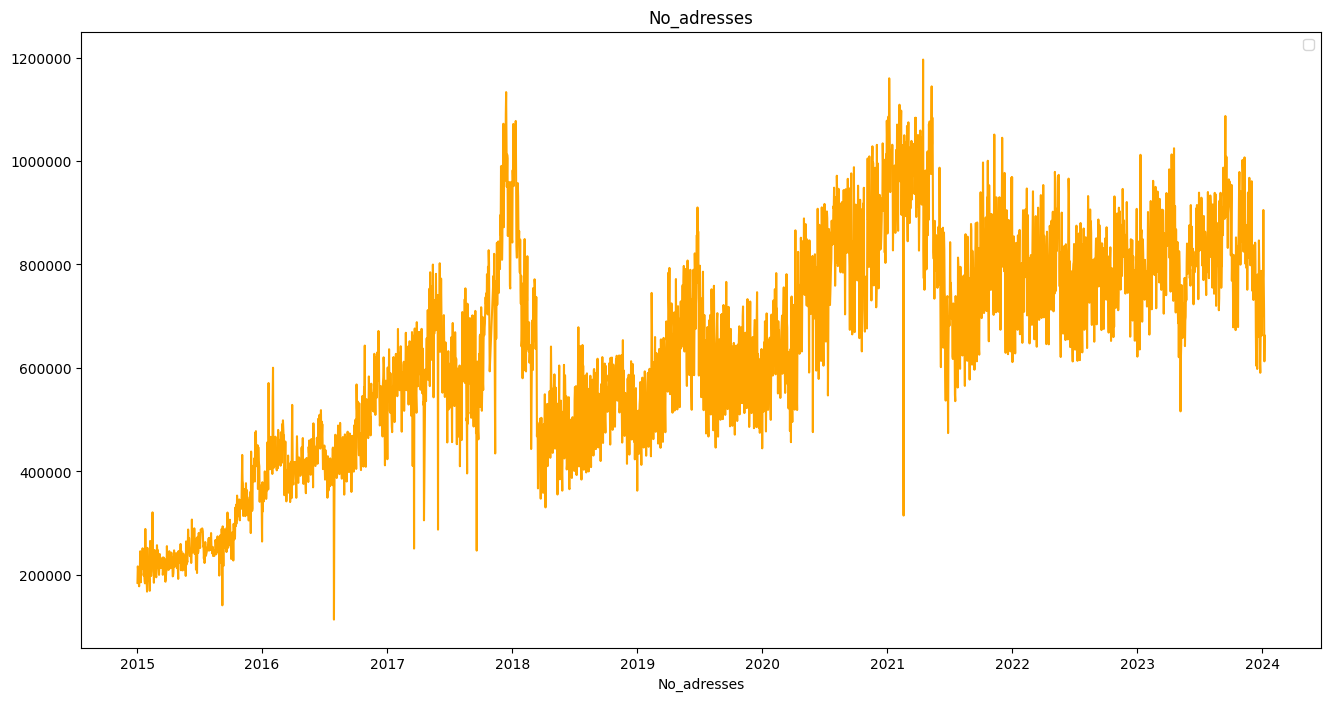

In [7]:
plt.figure(figsize=(16, 8)) 
  
plt.plot(date['Date'], date['No_adresses'], color='orange') 
#date['No_adresses'].plot(label='No_adresses') 

plt.ticklabel_format(style='plain', axis = 'y') 

plt.title('No_adresses') 
  
plt.xlabel('No_adresses') 
  
plt.legend() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


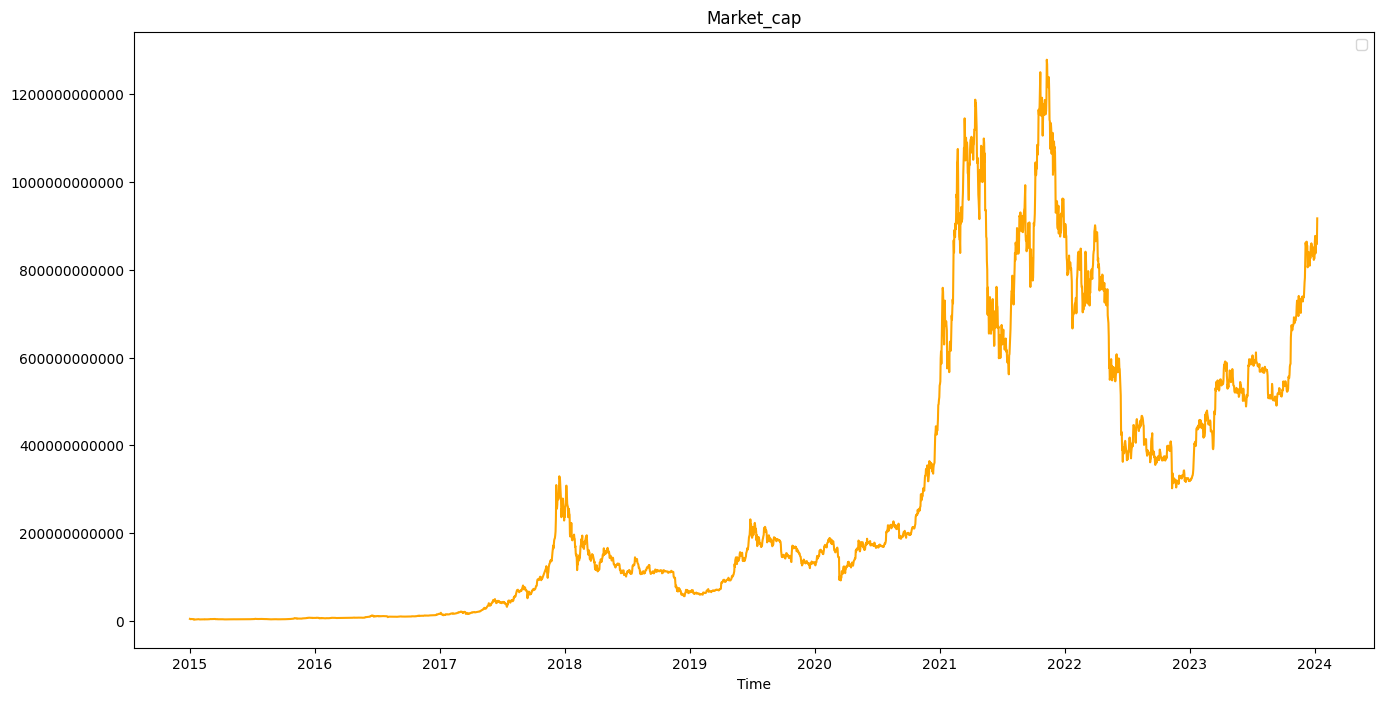

In [8]:
plt.figure(figsize=(16, 8)) 
  
plt.plot(date['Date'], date['Market_cap'], color='orange') 
#date['No_adresses'].plot(label='No_adresses') 

plt.ticklabel_format(style='plain', axis = 'y') 

plt.title('Market_cap') 
  
plt.xlabel('Time') 
  
plt.legend() 

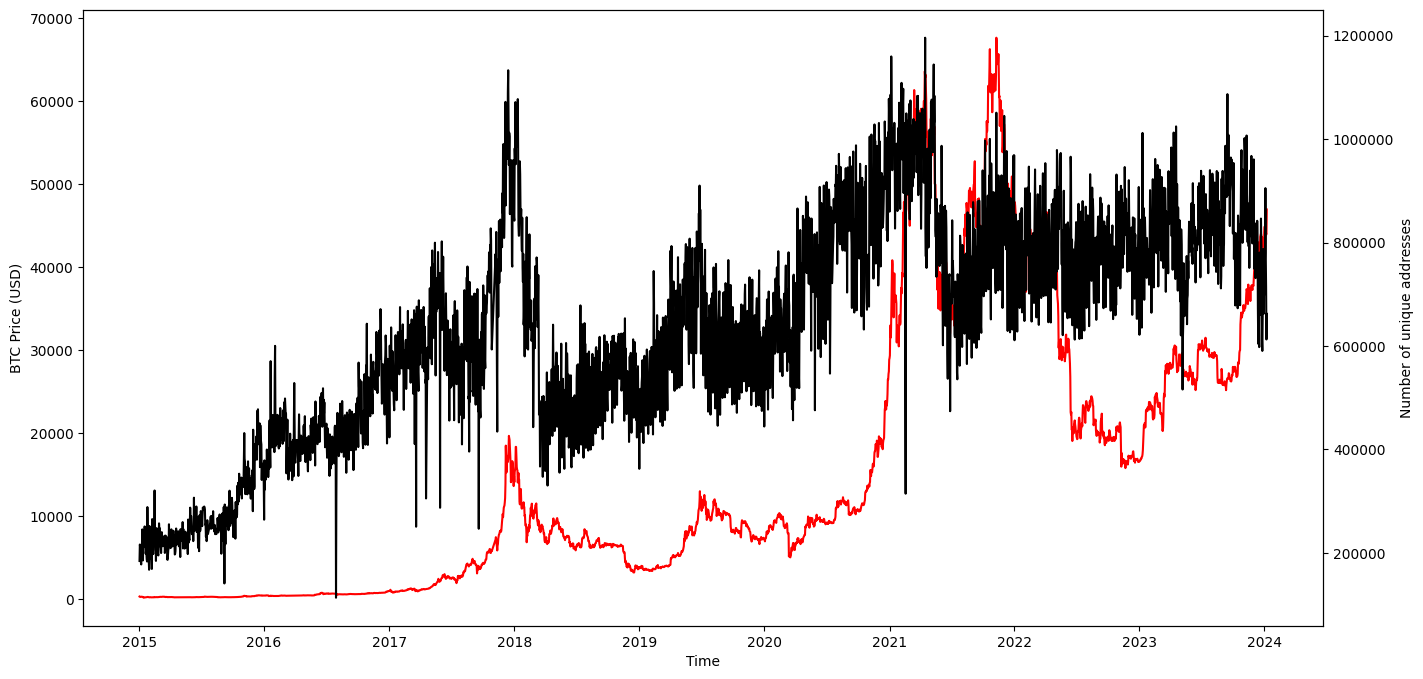

In [9]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

plt.ticklabel_format(style='plain', axis = 'y') 

ax1.plot(date['Date'], date['Price'], color='red')
ax2.plot(date['Date'], date['No_adresses'], color='black')

ax1.set_xlabel('Time')  
ax2.set_xlabel('Time') 


ax1.set_ylabel('BTC Price (USD)') 
ax2.set_ylabel('Number of unique addresses') 


plt.show()


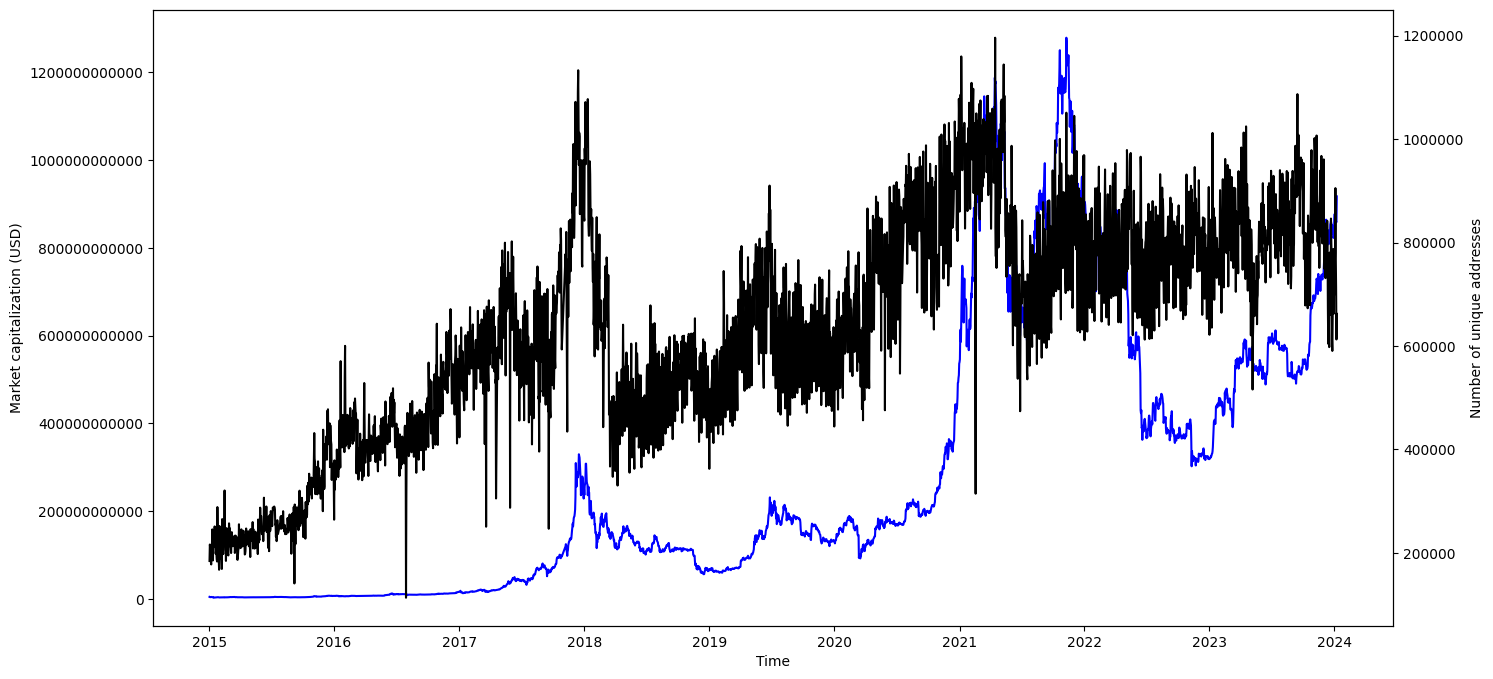

In [10]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

ax1.ticklabel_format(useOffset=False, style='plain')
ax2.ticklabel_format(useOffset=False, style='plain')

ax1.plot(date['Date'], date['Market_cap'], color='blue')
ax2.plot(date['Date'], date['No_adresses'], color='black')

ax1.set_xlabel('Time')  
ax2.set_xlabel('Time')

ax1.set_ylabel('Market capitalization (USD)') 
ax2.set_ylabel('Number of unique addresses')




plt.show()

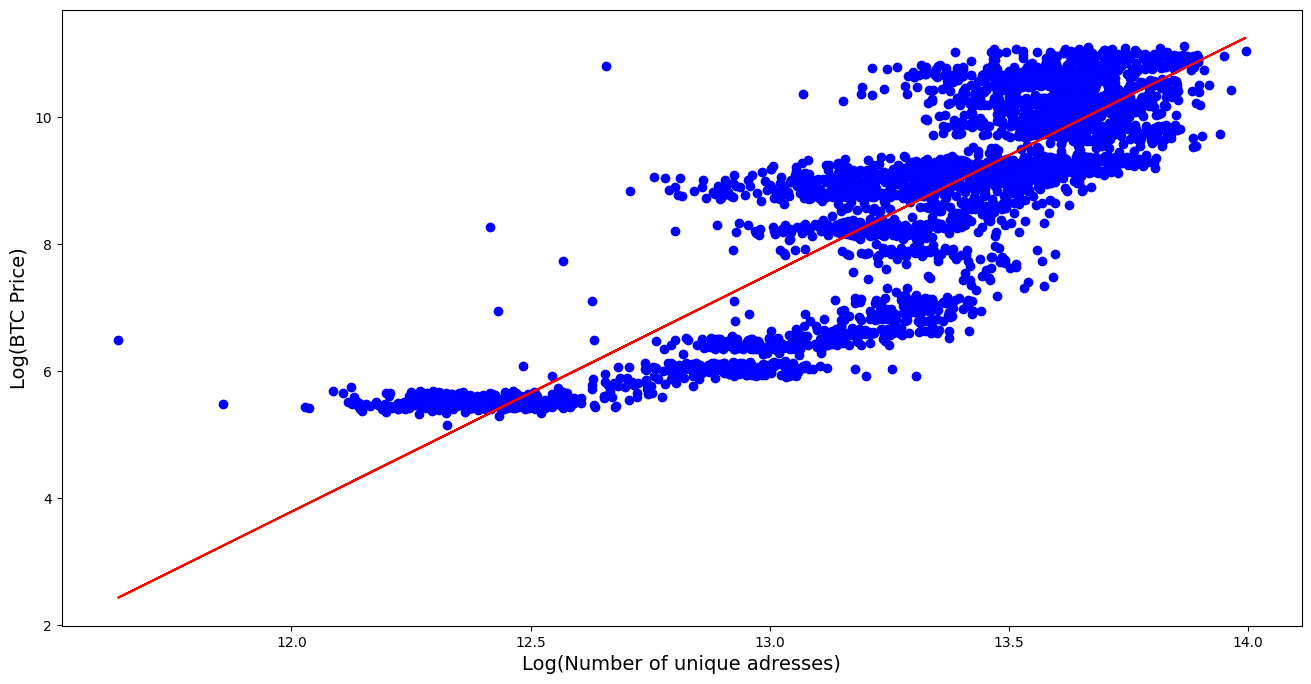

In [11]:
plt.figure(figsize=(16, 8)) 

plt.scatter(np.log(date['No_adresses']), np.log(date['Price']), color ='blue')

m, b = np.polyfit(np.log(date['No_adresses']), np.log(date['Price']), 1)

plt.ticklabel_format(style='plain', axis = 'y') 
plt.ticklabel_format(style='plain', axis = 'x') 

plt.plot(np.log(date['No_adresses']), m*np.log(date['No_adresses'])+b, color = 'red')

plt.xlabel('Log(Number of unique adresses)', size = 14) 
  
plt.ylabel('Log(BTC Price)', size = 14) 

plt.show()


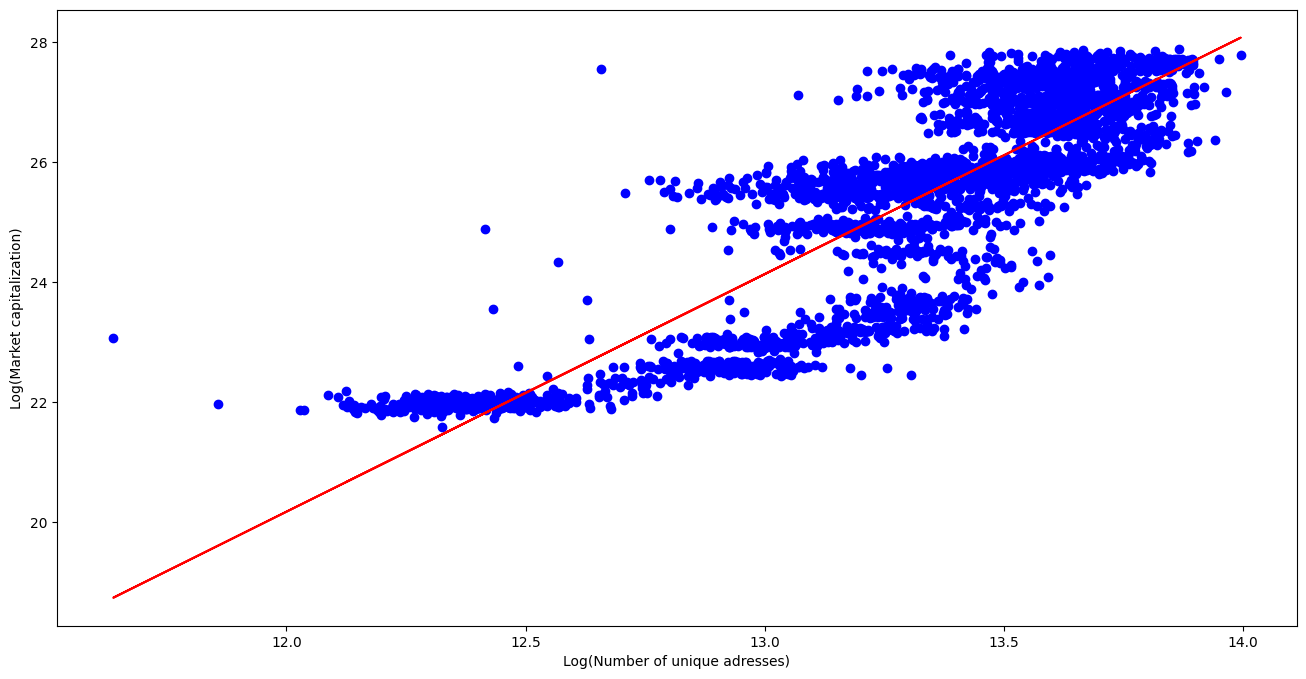

In [12]:
plt.figure(figsize=(16, 8)) 

plt.scatter(np.log(date['No_adresses']), np.log(date['Market_cap']), color ='blue')

m, b = np.polyfit(np.log(date['No_adresses']), np.log(date['Market_cap']), 1)

plt.ticklabel_format(style='plain', axis = 'y') 
plt.ticklabel_format(style='plain', axis = 'x') 

plt.plot(np.log(date['No_adresses']), m*np.log(date['No_adresses'])+b, color = 'red')

plt.xlabel('Log(Number of unique adresses)') 
  
plt.ylabel('Log(Market capitalization)') 

plt.show()

In [13]:
df = date[['Date', 'Price', 'No_adresses', 'Volume']]

In [14]:
date['logprice'] = np.log(date['Price'])
date['logvolume'] = np.log(date['Volume'])
date['logreturn'] = date['logprice'] - date['logprice'].shift(1)
date['logmarketcap'] = np.log(date['Market_cap'])
date['logusers'] = np.log(date['No_adresses'])
date['lag_logusers'] = date['logusers'].shift(1)
#date['logwallets'] = np.log(date['wallets'])
date['ch_users'] = date['logusers'] - date['lag_logusers']

In [20]:
date = date.dropna()

In [39]:
def run_regression(df, target_column, feature_columns):

    X = sm.add_constant(df[feature_columns])
    
    model = sm.OLS(df[target_column], X)
    results = model.fit()
    
    return results



In [36]:
def run_regression(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

In [42]:
lm_marketcap = run_regression(date, 'logmarketcap', ['logusers','logvolume'])
lm_price = run_regression(date, 'logprice', ['logusers', 'logvolume'])

In [43]:
print(lm_marketcap.summary())

                            OLS Regression Results                            
Dep. Variable:           logmarketcap   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     7292.
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        12:01:44   Log-Likelihood:                -3797.6
No. Observations:                3269   AIC:                             7601.
Df Residuals:                    3266   BIC:                             7619.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0552      0.580    -24.215      0.0

In [44]:
print(lm_price.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     7003.
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        12:01:45   Log-Likelihood:                -3681.6
No. Observations:                3269   AIC:                             7369.
Df Residuals:                    3266   BIC:                             7387.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.6432      0.560    -51.130      0.0